<a href="https://colab.research.google.com/github/aarishlakhani/Machine-Learning/blob/main/Copy_of_Assignment_1_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car.
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance, DO NOT USE)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [2]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
!gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp

Downloading...
From: https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp
To: /content/car_data.csv
100% 15.9k/15.9k [00:00<00:00, 29.2MB/s]



## Part 1
### Question 1.1:


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

              MPG   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  
count    392.000000  
mean      15.541327  
std        2.758864  
min        8.000000  
25%       13.775000  
50%       15.500000  
75%       17.025000  
max       24.800000  


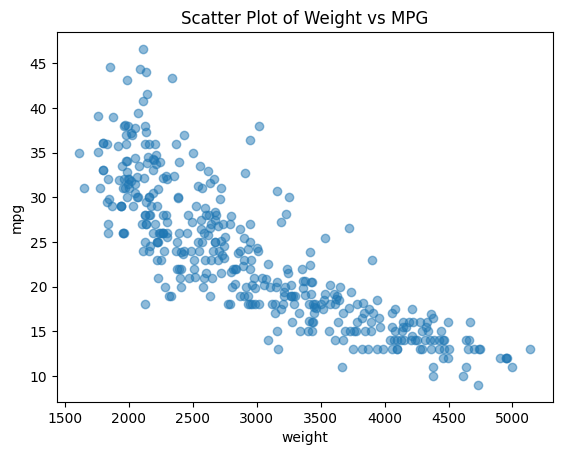

In [9]:
# YOUR CODE HERE
#reading file as a pandas dataframe
df = pd.read_csv("car_data.csv")
#printing descriptive statistics
print(df.describe())
#rename x and y axis
x = df["weight"]
y = df["MPG"]
#add alpha and plot a scatter plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Scatter Plot of Weight vs MPG")
plt.show()

**Written answer: What do you see here? Discuss your findings**<br>
I see an inverse coorelation between weight and mpg. As weight of a vehicle increases the mpg(measure of how far a vehicle can travel on one gallon of fuel) decreases

### Question 1.2: point

Recall that the linear model, we obtain predictions by computing

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$. Print the dimensionality of the numpy-array that you get.

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [18]:
#function to compute linear model predictions given data X and coefficient b
def linearModelPredict(X, b):
  yp=np.dot(X, b)
  return yp
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
yp = linearModelPredict(X=X, b=b)
#print linear modle predicitions yp
print(yp)
#to confirm dimesions of array
print(yp.shape)

[ 0.1 -0.2  0.7]
(3,)


### Question 1.3:

Write a function `linearModelMSE` which computes and returns the mean squared error parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1D-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2D-array, and as its third argument a 1D-array `y` of observed outcomes. Recall that:

$$
MSE(y_i, \hat{y_i}) = \frac{1}{|I|} \sum_i (y_i - \hat{y_i})^2
$$
$$
\nabla MSE(y, \hat{y}) = -\frac{2}{|I|} \left[(y-\hat{y}) \cdot X\right]
$$

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.



In [20]:
# Your code here.
#function to compute linear model predictions given data X and coefficient b
def linearModelPredict(X, b):
  yp=np.dot(X, b)
  return yp
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
yp = linearModelPredict(X=X, b=b)
residual = y-yp
mse = np.mean(residual**2)
print(mse)
# Calculate gradient using matrix multiplication to handle shapes correctly
gradient = -2 * np.dot(X.T, residual) / len(residual)
print(gradient)

0.6866666666666666
[-1.2        -1.33333333]


**Written answer**: To minimize the loss, do you need

1.   Increase the value of b0
2.   Increase the value of b1

increase or decrease the value of the parameters?

**Your answer here.**

MSE- 0.6866666666666666 <br>
Gradient- [-1.2, -1.33333333]

### Question 1.4:

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2D-array, as its second argument a 1D-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. Pass the argument `jac=True` to the `minimize` function so that it uses your gradient.

Test the function with the values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```

Report the best parameters and the fitted $R^2$.


In [22]:
def linearModelFit(X, y, lossfcn):
    # Initialize beta with zeros
    beta_init = np.zeros(X.shape[1])
    # Minimize the loss function
    result = minimize(
        fun=lambda b: lossfcn(b, X, y),
        x0=beta_init,
        jac=True,
        method='BFGS'
    )

    # Extract the best betas
    betas = result.x
    # Compute predictions using the best betas
    y_hat = np.dot(X, betas)
    # Calculate R^2
    ss_res = np.sum((y - y_hat) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)  # R^2 formula
    return betas, r2

# Loss function (reuse from Question 1.3)
def linearModelMSE(beta, X, y):
    y_hat = np.dot(X, beta)
    residuals = y - y_hat
    mse = np.mean(residuals ** 2)
    gradient = -2 * np.dot(X.T, residuals) / len(residuals)
    return mse, gradient

# Test the function
X = np.array([[1, 0], [1, -1], [1, 2]])
y = np.array([0, 0.4, 2])

# Fit the model
betas, r2 = linearModelFit(X, y, linearModelMSE)

# Report results
print("Best parameters (betas):", betas)
print("Fitted R^2:", r2)


Best parameters (betas): [0.59999731 0.600001  ]
Fitted R^2: 0.7499999999904616


### Question 1.5:

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and only the weight variable as the independent (x). Fit the model with a constant. Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


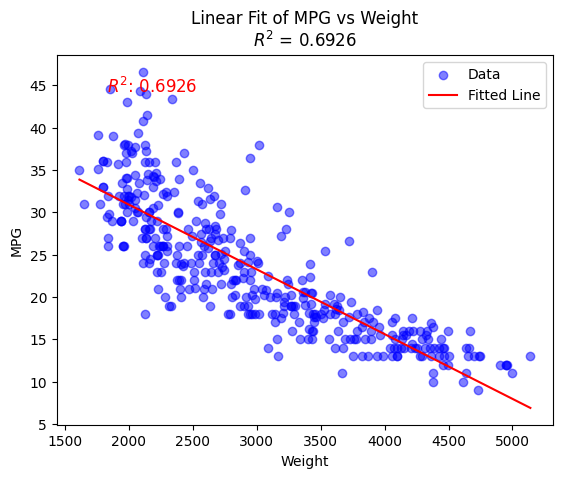

(array([ 4.62165245e+01, -7.64734254e-03]), 0.6926304331206254)

In [24]:
# Your code here
# Define the linearModelFit function
def linearModelFit(X, y, lossfcn):
    beta_init = np.zeros(X.shape[1])
    result = minimize(
        fun=lambda b: lossfcn(b, X, y),
        x0=beta_init,
        jac=True,
        method='BFGS'
    )
    betas = result.x
    y_hat = np.dot(X, betas)
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return betas, r2

# Define the linearModelMSE function
def linearModelMSE(beta, X, y):
    y_hat = np.dot(X, beta)
    residuals = y - y_hat
    mse = np.mean(residuals ** 2)
    gradient = -2 * np.dot(X.T, residuals) / len(residuals)
    return mse, gradient

# Load the car data
car_data = pd.read_csv("car_data.csv")

# Extract the target (MPG) and independent (weight) variables
y = car_data['MPG'].values
X_weight = car_data['weight'].values

# Add a constant column to the design matrix (for the intercept)
X = np.column_stack((np.ones_like(X_weight), X_weight))

# Fit the linear model using the previously defined functions
betas, r2 = linearModelFit(X, y, linearModelMSE)

# Generate a grid of equally spaced weights for predictions
weight_grid = np.linspace(X_weight.min(), X_weight.max(), 100)
X_grid = np.column_stack((np.ones_like(weight_grid), weight_grid))

# Make predictions on the grid
y_pred_grid = np.dot(X_grid, betas)

# Plot the data and the fitted line
plt.scatter(X_weight, y, alpha=0.5, label='Data', color='blue')
plt.plot(weight_grid, y_pred_grid, color='red', label='Fitted Line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title(f'Linear Fit of MPG vs Weight\n$R^2$ = {r2:.4f}')
plt.legend()
plt.annotate(f'$R^2$: {r2:.4f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

# Report results
betas, r2

**Your answer here**
R^2 = 0.6926

### Question 1.6:

Now use sklearn's `linear_model` to fit the model with all the available data. Plot the data and add a line for the predicted values as you did in the previous question. Also report the $R^2$ value for the fit.

**Written answer: How much do you gain by having more variables?**

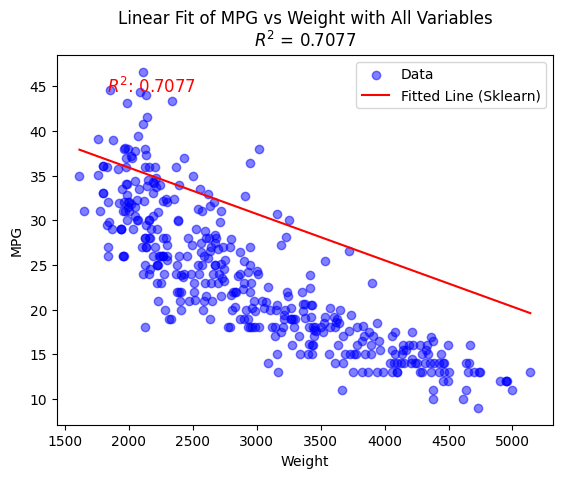

R^2 Value: 0.7076926326770516


In [27]:
from sklearn.linear_model import LinearRegression


car_data = pd.read_csv("car_data.csv")
y = car_data['MPG'].values
X_all = car_data.select_dtypes(include=[np.number]).drop(columns=['MPG']).values  # Drop MPG as it's the target

# Fit the model using sklearn's LinearRegression
model = LinearRegression()
model.fit(X_all, y)

# Get predictions and R^2 value
y_pred = model.predict(X_all)
r2_sklearn = model.score(X_all, y)

# Generate a grid of equally spaced weights
weight_grid = np.linspace(car_data['weight'].min(), car_data['weight'].max(), 100).reshape(-1, 1)

# Prepare a matrix for predictions over the weight grid
X_grid = np.zeros((100, X_all.shape[1]))
weight_col_idx = car_data.columns.get_loc('weight') - 1  # Find the index of the 'weight' column
X_grid[:, weight_col_idx] = weight_grid.flatten()

# Generate predictions for weight grid
y_pred_grid = model.predict(X_grid)

# Plot the data and the fitted line
plt.scatter(car_data['weight'], y, alpha=0.5, label='Data', color='blue')
plt.plot(weight_grid, y_pred_grid, color='red', label='Fitted Line (Sklearn)')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title(f'Linear Fit of MPG vs Weight with All Variables\n$R^2$ = {r2_sklearn:.4f}')
plt.legend()
plt.annotate(f'$R^2$: {r2_sklearn:.4f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

# R^2 value
print("R^2 Value:", r2_sklearn)

**Your answer here.**
By including all available variables in the model, the
R^2 value improved from 0.6926 to 0.7077. This indicates a modest gain in explanatory power. While weight alone explains a significant portion of the variance, the additional variables capture further nuances, leading to a better overall fit. This shows that other variables, beyond weight, contribute meaningfully to predicting MPG. ​

## Part 2: LAD Regression

### Question 2.1:

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss $LAD(y_i, \hat{y_i})$.

$$
LAD(y_i, \hat{y_i}) = \frac{1}{|I|}\sum_i |y_i - \hat{y_i}|
$$

where $y_i$ is the true label of sample $i \in I$, $\hat{y_i}$ is the prediction, $I$ is the sample set, and $|I|$ is the number of cases in the sample. The gradient of the function is:

$$
\nabla LAD(y, \hat{y}) = - \frac{ sign(y_i - \hat{y_i}) \cdot X}{|I|}
$$

with `sign` the sign function. Note this function is undefined at 0.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss, following the same structured as the previous part.

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.

In [29]:
def linearModelLossLAD(beta, X, y):
    y_hat = np.dot(X, beta)
    # Compute residuals
    residuals = y - y_hat
    # Compute LAD loss
    lad_loss = np.mean(np.abs(residuals))
    # Compute gradient of LAD loss
    sign_residuals = np.sign(residuals)
    gradient = -np.dot(X.T, sign_residuals) / len(residuals)
    return lad_loss, gradient

# Test the function
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

# Compute LAD loss and gradient
lad_loss, lad_gradient = linearModelLossLAD(beta=b, X=X, y=y)

# Print the results
print("LAD Loss:", lad_loss)
print("LAD Gradient:", lad_gradient)

LAD Loss: 0.6666666666666666
LAD Gradient: [-0.33333333 -0.33333333]


### Question 2.2:


Use the above functions to fit your LAD model using the weight variable as input, to predict the mpg. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

**Written answer**: What is the difference in the fit obtained with an $L_1$ as compared to the $L_2$ cost function? How do their $R^2$ values compare? Why?  

Note: If you receive an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient-based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



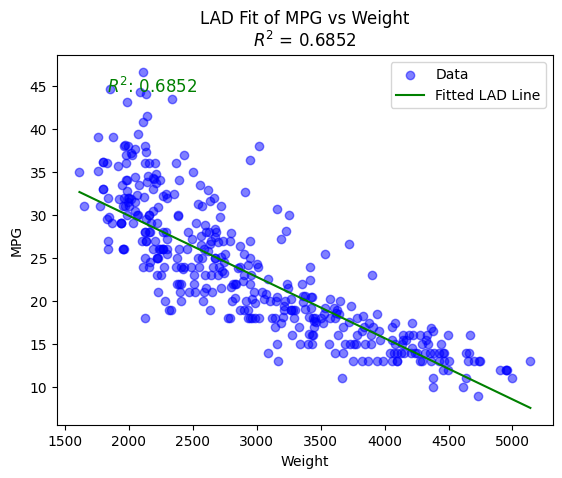

Estimated Coefficients (Betas): [ 4.41206179e+01 -7.10895102e-03]
R^2 Value for LAD Fit: 0.6852006754231886


In [30]:
# Your code here

def fitLADModel(X, y, lossfcn):

    # Initialize beta with zeros
    beta_init = np.zeros(X.shape[1])

    # Minimize the LAD loss function
    result = minimize(
        fun=lambda b: lossfcn(b, X, y)[0],  # Use the LAD loss only
        x0=beta_init,
        method="Powell"  # Use Powell method for non-differentiable losses
    )

    # Extract the best coefficients (betas)
    betas = result.x

    # Compute predictions using the best betas
    y_hat = np.dot(X, betas)

    # Calculate R^2
    ss_res = np.sum((y - y_hat) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)  # R^2 formula

    return betas, r2

# Define the LAD loss function
def linearModelLossLAD(beta, X, y):
    y_hat = np.dot(X, beta)
    residuals = y - y_hat
    lad_loss = np.mean(np.abs(residuals))
    sign_residuals = np.sign(residuals)
    gradient = -np.dot(X.T, sign_residuals) / len(residuals)
    return lad_loss, gradient

# Load the car data
car_data = pd.read_csv("car_data.csv")

# Prepare data: weight as input and mpg as target
X_weight = car_data['weight'].values.reshape(-1, 1)
y_mpg = car_data['MPG'].values

# Add a constant (intercept term)
X = np.column_stack((np.ones_like(X_weight), X_weight))

# Fit the LAD model
lad_betas, lad_r2 = fitLADModel(X, y_mpg, linearModelLossLAD)

# Generate predictions along a grid of weights
weight_grid = np.linspace(X_weight.min(), X_weight.max(), 100).reshape(-1, 1)
X_grid = np.column_stack((np.ones_like(weight_grid), weight_grid))
y_pred_grid = np.dot(X_grid, lad_betas)

# Plot the data and the fitted LAD line
plt.scatter(X_weight, y_mpg, alpha=0.5, label='Data', color='blue')
plt.plot(weight_grid, y_pred_grid, color='green', label='Fitted LAD Line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title(f'LAD Fit of MPG vs Weight\n$R^2$ = {lad_r2:.4f}')
plt.legend()
plt.annotate(f'$R^2$: {lad_r2:.4f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='green')
plt.show()

# Report results
print("Estimated Coefficients (Betas):", lad_betas)
print("R^2 Value for LAD Fit:", lad_r2)


**Your answer here.**
The LAD regression model minimizes absolute errors, making the fitted line less influenced by outliers compared to the L2 loss, which minimizes squared errors. This results in a more robust fit that is better suited to datasets containing outliers. In terms of R2, the L1 fit typically has a slightly lower R2 value than the L2	fit because LAD prioritizes robustness over capturing extreme data points. The L2
​loss is sensitive to large residuals, which can inflate the model’s fit to outliers, leading to higher R2 values. In contrast, the LAD regression provides a more balanced fit by aligning with the median trend of the data, ensuring that the model better represents the overall pattern while reducing the influence of extreme values.

### Question 2.3:

Now we will use all data for the fit. Fit an LAD model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`QuantileRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) class that implements a [pinball loss](https://en.wikipedia.org/wiki/Quantile_regression), a more general case of the [`mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) loss. To get an MAD regression, set the parameters `alpha=0` and `quantile=0.5` in the `QuantileRegressor` call.

In no more than two sentences, comment on the $R^2$ values for both the OLS and MAD regressions. Use the `sklearn` models for this analysis. Are they similar? Make a scatterplot of the sklearn's OLS and MAD predictions.

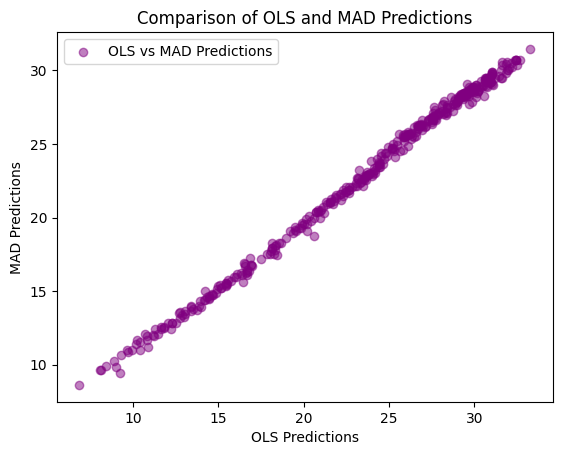

R^2 for OLS Regression: 0.7077
R^2 for MAD Regression: 0.6922


In [31]:
# Your code here
from sklearn.linear_model import QuantileRegressor, LinearRegression

# Prepare the data: exclude the "name" column and ensure only numeric columns are used
X_all = car_data.select_dtypes(include=[np.number]).drop(columns=['MPG']).values  # Independent variables
y = car_data['MPG'].values  # Target variable

# Fit an OLS model using sklearn's LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_all, y)
y_ols_pred = ols_model.predict(X_all)
r2_ols = ols_model.score(X_all, y)

# Fit an MAD model using sklearn's QuantileRegressor
mad_model = QuantileRegressor(alpha=0, quantile=0.5, solver='highs')
mad_model.fit(X_all, y)
y_mad_pred = mad_model.predict(X_all)
r2_mad = mad_model.score(X_all, y)

# Scatterplot of predictions from OLS and MAD models
plt.scatter(y_ols_pred, y_mad_pred, alpha=0.5, color='purple', label='OLS vs MAD Predictions')
plt.xlabel('OLS Predictions')
plt.ylabel('MAD Predictions')
plt.title('Comparison of OLS and MAD Predictions')
plt.legend()
plt.show()

# Report R^2 values
print(f"R^2 for OLS Regression: {r2_ols:.4f}")
print(f"R^2 for MAD Regression: {r2_mad:.4f}")



**Your answer here.**<br>
R^2 for OLS Regression: 0.7077<br>
R^2 for MAD Regression: 0.6922